In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import delta_hedging as dh

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

####################################################################
#  FINANCEPY BETA Version 0.370 - This build: 28 Oct 2024 at 20:26 #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



### Toy example - low vol

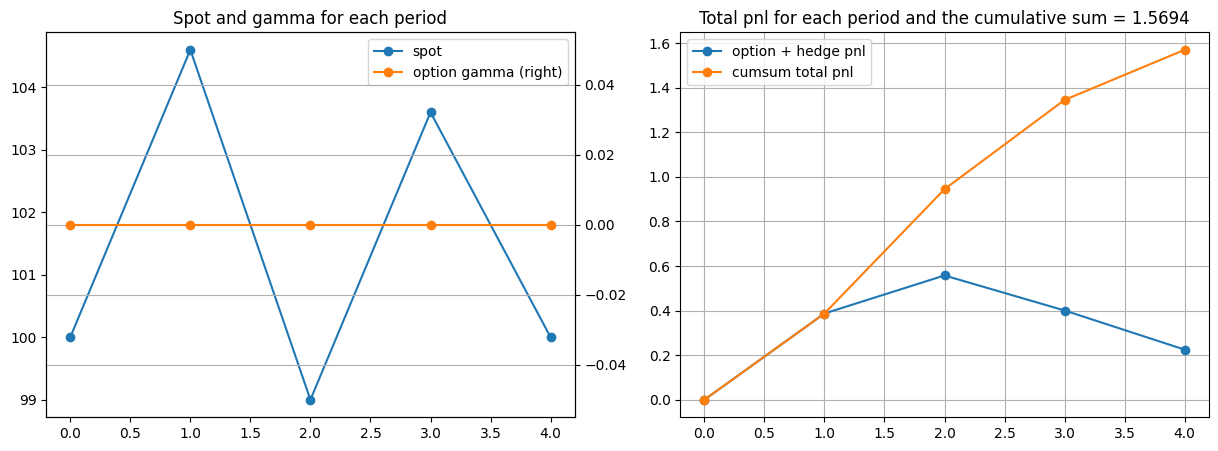

In [2]:
spot_path = [100, 104.6, 99, 103.6, 100]
num_steps = 5
ivol = 0.1
hvol = 0.1
dt = 0.01; Option_Maturity = 1; K = 100
df, total_portfolio_pnl = dh.compute_delta_hedging_call_pnl(spot_path, dt, ivol, K, Option_Maturity, hvol)
#df = round(df, 4)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].set_title('Spot and gamma for each period')
df.plot(y=['spot', 'option gamma'], secondary_y=['option gamma'], ax=axes[0], grid=True, style='-o')
axes[1].set_title('Total pnl for each period and the cumulative sum = ' + str(round(total_portfolio_pnl, 4)))
df.plot(y=['option + hedge pnl', 'cumsum total pnl'], ax=axes[1], grid=True, style='-o')

#fig.savefig("L3_FigTradingGamma1.png")
df[['spot', 'option price', 'option delta', 'option pnl', 'hedge pnl', 'option + hedge pnl']].to_excel('low vol.xlsx')


### Higher Vol

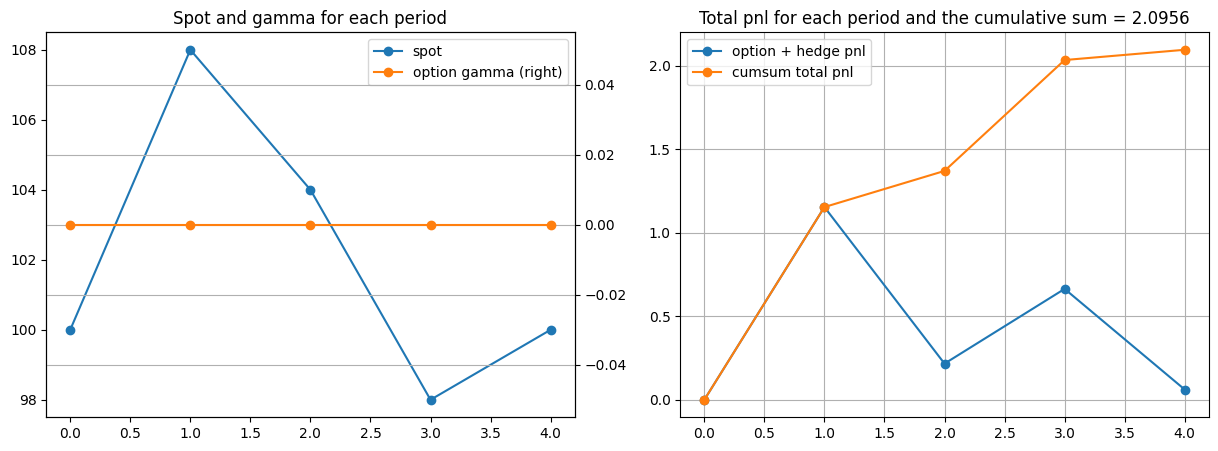

In [3]:
spot_path = [100, 108, 104, 98, 100]

num_steps = 5
ivol = 0.1
hvol = 0.1
dt = 0.01; Option_Maturity = 1; K = 100
df, total_portfolio_pnl = dh.compute_delta_hedging_call_pnl(spot_path, dt, ivol, K, Option_Maturity, hvol)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].set_title('Spot and gamma for each period')
df.plot(y=['spot', 'option gamma'], secondary_y=['option gamma'], ax=axes[0], grid=True, style='-o')
axes[1].set_title('Total pnl for each period and the cumulative sum = ' + str(round(total_portfolio_pnl, 4)))
df.plot(y=['option + hedge pnl', 'cumsum total pnl'], ax=axes[1], grid=True, style='-o')

#fig.savefig("L3_FigTradingGamma2.png")
df[['spot', 'option price', 'option delta', 'option pnl', 'hedge pnl', 'option + hedge pnl']].to_excel('high vol.xlsx')

### Just drifting up

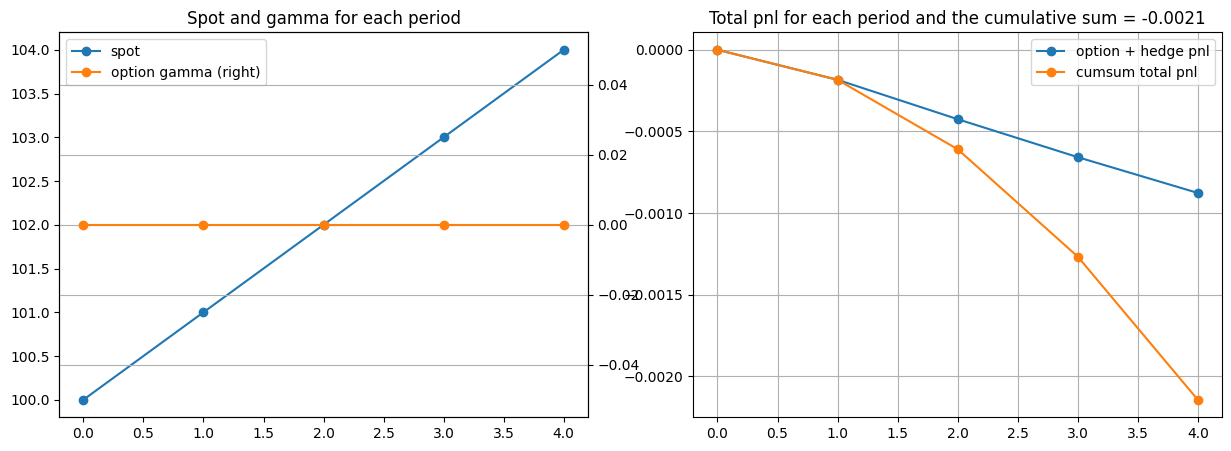

In [4]:
spot_path = [100, 101, 102, 103, 104]

num_steps = 5
ivol = 0.1
hvol = 0.1
dt = 0.01; Option_Maturity = 1; K = 100
df, total_portfolio_pnl = dh.compute_delta_hedging_call_pnl(spot_path, dt, ivol, K, Option_Maturity, hvol)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].set_title('Spot and gamma for each period')
df.plot(y=['spot', 'option gamma'], secondary_y=['option gamma'], ax=axes[0], grid=True, style='-o')
axes[1].set_title('Total pnl for each period and the cumulative sum = ' + str(round(total_portfolio_pnl, 4)))
df.plot(y=['option + hedge pnl', 'cumsum total pnl'], ax=axes[1], grid=True, style='-o')

#fig.savefig("L3_FigTradingGamma2.png")
df[['spot', 'option price', 'option delta', 'option pnl', 'hedge pnl', 'option + hedge pnl']].to_excel('drift up.xlsx')

### Just drifting down

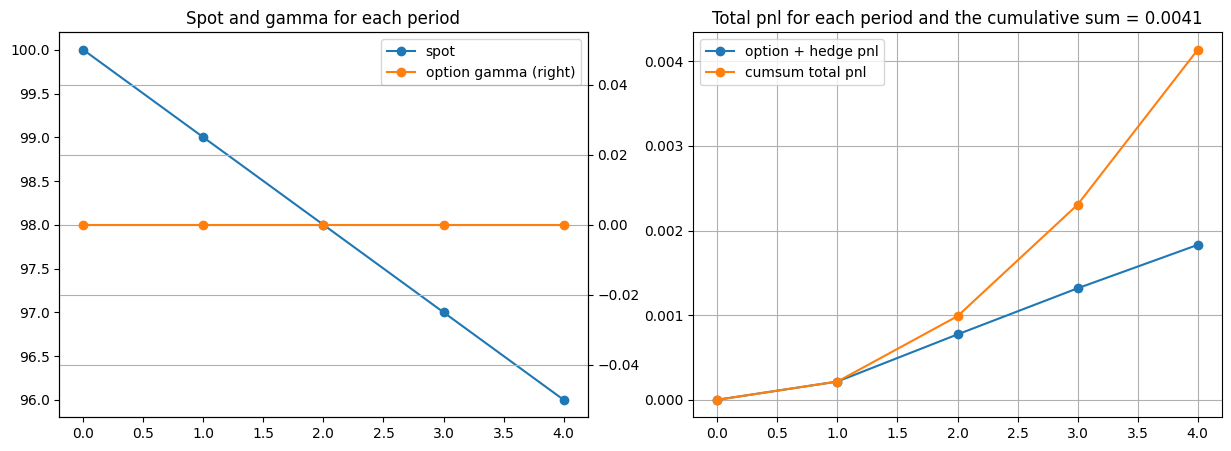

In [5]:
spot_path = [100, 99, 98, 97, 96]

num_steps = 5
ivol = 0.1
hvol = 0.1
dt = 0.01; Option_Maturity = 1; K = 100
df, total_portfolio_pnl = dh.compute_delta_hedging_call_pnl(spot_path, dt, ivol, K, Option_Maturity, hvol)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].set_title('Spot and gamma for each period')
df.plot(y=['spot', 'option gamma'], secondary_y=['option gamma'], ax=axes[0], grid=True, style='-o')
axes[1].set_title('Total pnl for each period and the cumulative sum = ' + str(round(total_portfolio_pnl, 4)))
df.plot(y=['option + hedge pnl', 'cumsum total pnl'], ax=axes[1], grid=True, style='-o')

#fig.savefig("L3_FigTradingGamma2.png")
df[['spot', 'option price', 'option delta', 'option pnl', 'hedge pnl', 'option + hedge pnl']].to_excel('drift down.xlsx')

### Doing many simulation and get the distribution of the PNL

In [6]:
def compute_total_portfolio_pnl(S0, r, realized_vol, dt, num_steps, ivol, K, Option_Maturity, num_sims, hvol):
    total_portfolio_pnls = np.zeros(num_sims)
    np.random.seed(1426)
    for i in range(0, num_sims):
        spot_path = dh.generate_lognormal_sample_path(S0, r, realized_vol, dt, num_steps)
        df, total_portfolio_pnl = dh.compute_delta_hedging_call_pnl(spot_path, dt, ivol, K, Option_Maturity, hvol)
        total_portfolio_pnls[i] = total_portfolio_pnl
        
    return total_portfolio_pnls

In [7]:
S0 = 100
r = 0
num_steps = 120
num_sims = 3000
Option_Maturity = 30.0/365
dt = Option_Maturity/num_steps
K = 100
ivol = 0.20
print(dt)

0.0006849315068493151


In [8]:
#Hedge using ivol

realized_vols = [0.1, 0.2, 0.3, 0.4]
total_pnls = [compute_total_portfolio_pnl(S0, r, rv, dt, num_steps, ivol, K, Option_Maturity, num_sims, rv) for rv in realized_vols]

array([<Axes: title={'center': 'ivol = 0.2, rvol = 0.4, hvol = 0.4, \ndt = 0.0007, \n mean = 2.278, std = 0.3547'}>],
      dtype=object)

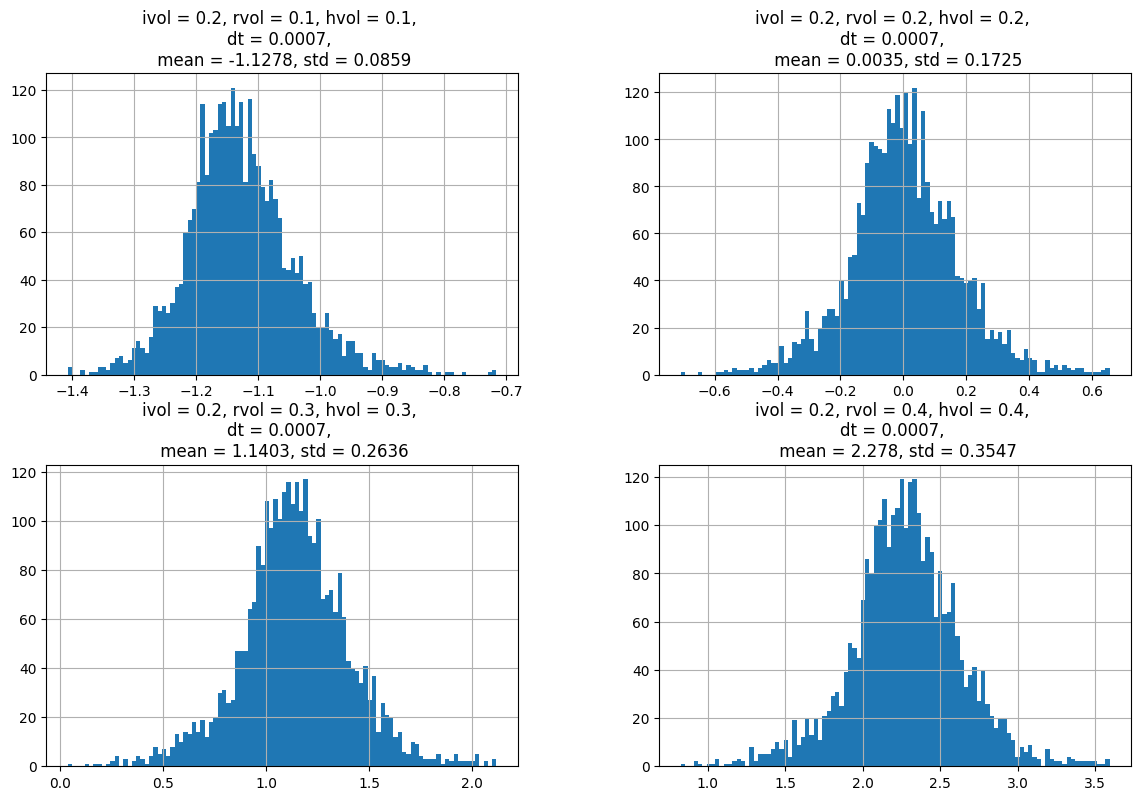

In [9]:
mean_values = [round(np.mean(pnl), 4) for pnl in total_pnls]
std_values = [round(np.std(pnl), 4) for pnl in total_pnls]
df_names = ['ivol = ' + str(ivol) 
            + ', rvol = ' + str(rv)
            + ', hvol = ' + str(rv) + ', \n'
            + 'dt = ' + str(round(dt, 4)) + ', \n'
            + ' mean = ' + str(mean) 
            + ', std = ' + str(std) 
            for mean, std, rv in zip(mean_values, std_values, realized_vols) ]

df_pnls = [pd.DataFrame(pnl, columns = [name]) for name, pnl in zip(df_names, total_pnls) ]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,9))
df_pnls[0].hist(bins=100, ax=axes[0,0], grid=True)
df_pnls[1].hist(bins=100, ax=axes[0,1], grid=True)
df_pnls[2].hist(bins=100, ax=axes[1,0], grid=True)
df_pnls[3].hist(bins=100, ax=axes[1,1], grid=True)
#plt.savefig("L3_delta_hedging_simulaitons_3_rv.png")


### Produce path by path information

In [10]:
S0 = 100
r = 0
num_steps = 120
num_sims = 10
Option_Maturity = 30.0/365
dt = Option_Maturity/num_steps
K = 100
ivol = 0.20
print(dt)

0.0006849315068493151


In [11]:
def compute_path_dependent_pnl(S0, r, realized_vol, dt, num_steps, ivol, K, Option_Maturity, num_sims, hvol):
    pnls = []
    np.random.seed(1426)
    for i in range(0, num_sims):
        spot_path = dh.generate_lognormal_sample_path(S0, r, realized_vol, dt, num_steps)
        df, total_portfolio_pnl = dh.compute_delta_hedging_call_pnl(spot_path, dt, ivol, K, Option_Maturity, hvol)
        pnls.append(df['cumsum total pnl'])
        
    return pnls

Text(0.5, 1.0, 'rvol = 0.4, hvol = 0.2')

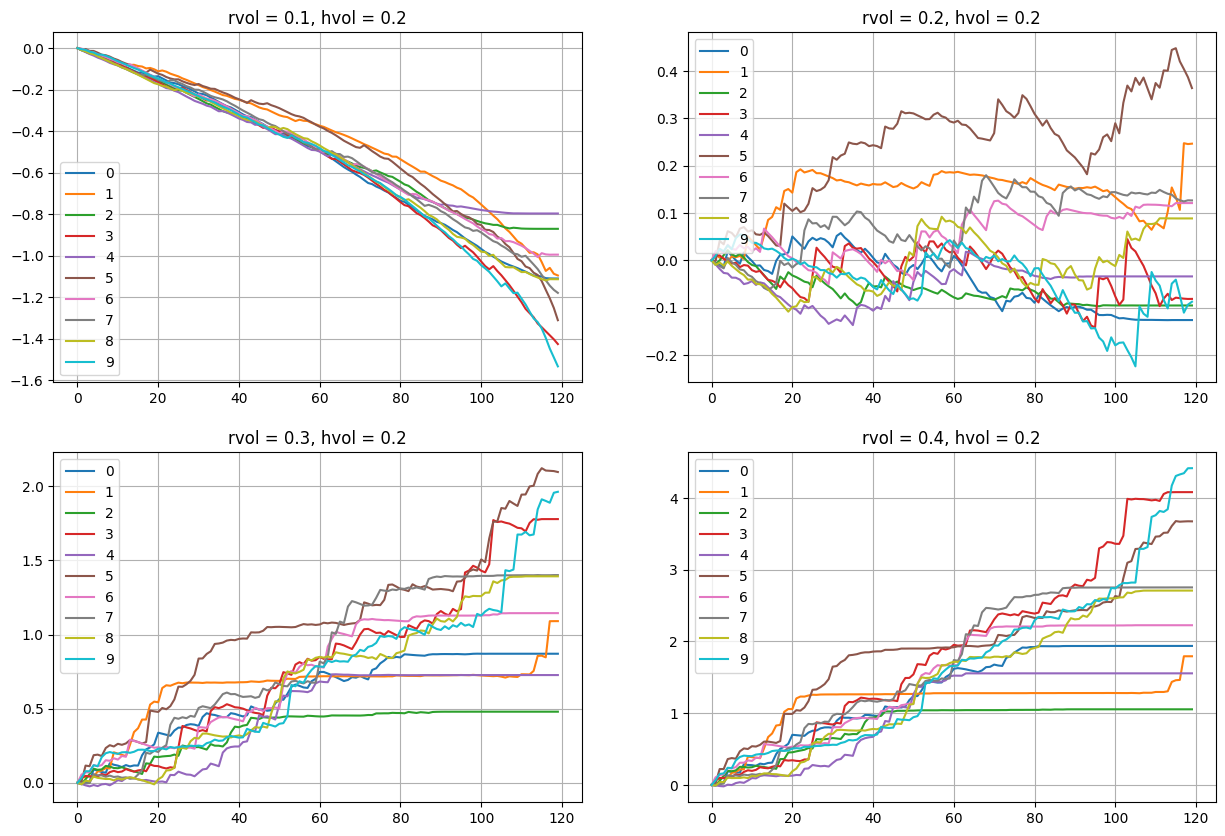

In [12]:
#Hedge using ivol

realized_vols = [0.1, 0.2, 0.3, 0.4]
path_dependent_pnl = [compute_path_dependent_pnl(S0, r, rv, dt, num_steps, ivol, K, Option_Maturity, num_sims, ivol) for rv in realized_vols]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
pd.DataFrame(np.transpose(path_dependent_pnl[0])).plot(ax=axes[0,0], grid=True)
pd.DataFrame(np.transpose(path_dependent_pnl[1])).plot(ax=axes[0,1], grid=True)
pd.DataFrame(np.transpose(path_dependent_pnl[2])).plot(ax=axes[1,0], grid=True)
pd.DataFrame(np.transpose(path_dependent_pnl[3])).plot(ax=axes[1,1], grid=True)
axes[0,0].set_title('rvol = 0.1, hvol = ' + str(ivol))
axes[0,1].set_title('rvol = 0.2, hvol = ' + str(ivol))
axes[1,0].set_title('rvol = 0.3, hvol = ' + str(ivol))
axes[1,1].set_title('rvol = 0.4, hvol = ' + str(ivol))
#plt.savefig("L3_hedge_use_ivol.png")

Text(0.5, 1.0, 'rvol = 0.4, hvol = 0.4')

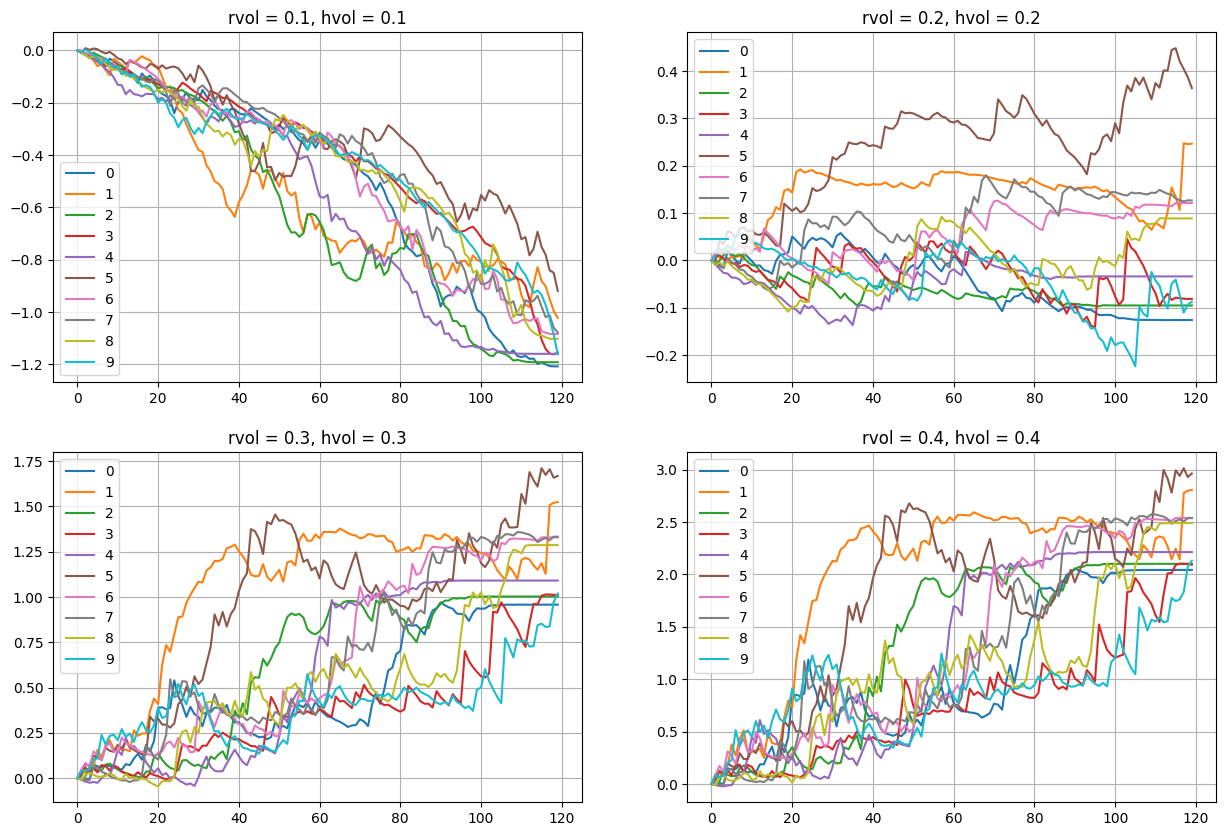

In [13]:
#Hedge using realized vol

realized_vols = [0.1, 0.2, 0.3, 0.4]
path_dependent_pnl = [compute_path_dependent_pnl(S0, r, rv, dt, num_steps, ivol, K, Option_Maturity, num_sims, rv) for rv in realized_vols]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
pd.DataFrame(np.transpose(path_dependent_pnl[0])).plot(ax=axes[0,0], grid=True)
pd.DataFrame(np.transpose(path_dependent_pnl[1])).plot(ax=axes[0,1], grid=True)
pd.DataFrame(np.transpose(path_dependent_pnl[2])).plot(ax=axes[1,0], grid=True)
pd.DataFrame(np.transpose(path_dependent_pnl[3])).plot(ax=axes[1,1], grid=True)
axes[0,0].set_title('rvol = 0.1, hvol = 0.1')
axes[0,1].set_title('rvol = 0.2, hvol = 0.2')
axes[1,0].set_title('rvol = 0.3, hvol = 0.3')
axes[1,1].set_title('rvol = 0.4, hvol = 0.4')
#plt.savefig("L3_hedge_use_rvol.png")